In [1]:
import pandas as pd
import sys
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.utils.np_utils import to_categorical 
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.optimizers import Adadelta, RMSprop
import matplotlib.pyplot as plt

#numpy.set_printoptions(threshold=sys.maxsize)

In [11]:
x_train = pd.read_pickle("/content/drive/MyDrive/Methods in AI research/datasets/training_dialog.pkl")
x_test = pd.read_pickle("/content/drive/MyDrive/Methods in AI research/datasets/test_dialog.pkl")

y_train = x_train.dialog_act.factorize(sort = False)

#print("y_train shape before hot encoding ", y_train.shape)
y_train = to_categorical(y_train[0], num_classes = 15)

print(y_train.shape)

#y_test = x_test.dialog_act
#print("y_test shape before hot encoding ", y_test.shape)
#y_test = to_categorical(y_test, num_classes = 15)

print(x_train.shape)
print(x_test.shape)

print("y_train shape after hot encoding ", y_train.shape)
#print("y_test shape after hot encoding ", y_test.shape)


(21675, 15)
(21675, 2)
(3826, 2)
y_train shape after hot encoding  (21675, 15)


In [12]:
## Vocabulary / Transformations

vectorizer = CountVectorizer()

tokenized_train = vectorizer.fit_transform(x_train.utterance_content).toarray()

tokenized_train = np.asarray(tokenized_train).astype('float32')

print("Vocabulary ", vectorizer.vocabulary_)

print(tokenized_train.shape)

tokenized_test = vectorizer.transform(x_test.utterance_content).toarray()

print(tokenized_test.shape)

Vocabulary  {'thank': 605, 'you': 715, 'bye': 91, 'restaurant': 499, 'in': 288, 'the': 611, 'south': 562, 'part': 443, 'of': 421, 'town': 625, 'that': 608, 'serves': 537, 'mexican': 372, 'food': 220, 'noise': 409, 'um': 644, 'east': 181, 'west': 686, 'serving': 539, 'christmas': 132, 'thai': 602, 'and': 27, 'uh': 643, 'their': 612, 'post': 468, 'code': 136, 'whats': 689, 'address': 6, 'phone': 450, 'number': 418, 'good': 248, 'doesnt': 168, 'matter': 362, 'okay': 425, 'how': 277, 'about': 2, 'bristish': 86, 'what': 688, 'is': 304, 'price': 476, 'range': 483, 'chinese': 128, 'yes': 714, 'type': 641, 'there': 615, 'anything': 32, 'else': 184, 'sil': 552, 'area': 37, 'want': 676, 'basque': 65, 'dont': 170, 'care': 107, 'cheap': 123, 'kind': 319, 'do': 166, 'they': 617, 'serve': 534, 'spanish': 564, 'im': 286, 'looking': 351, 'for': 222, 'any': 30, 'goodbye': 250, 'no': 407, 'american': 25, 'north': 412, 'swedish': 583, 'unintelligible': 649, 'id': 283, 'like': 343, 'to': 623, 'find': 214,

In [13]:
## Model Definition

model_name = 'First_model'
model_2_name = 'Second_model'

history_dict = {}

# Model 1 / Softmax Activation function
model = Sequential([], name = model_name)
model.add(keras.layers.Dense(128, input_shape=(719,)))
model.add(keras.layers.Dense(15, activation='softmax'))

# Model 2 / ReLu Activation function
model_2 = Sequential(name = model_2_name)
model_2.add(keras.layers.Dense(256, input_shape=(719,), activation = 'relu'))
model_2.add(Dropout(0.25))
model_2.add(keras.layers.Dense(15, activation='softmax'))


# Add models to this list 
models = [model, model_2]

for _model in models:
  print("Summary for model ", _model)
  print(_model.summary())
  _model.compile(loss='categorical_crossentropy', optimizer = RMSprop(), metrics='accuracy')
  history = _model.fit(tokenized_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2) 
  history_dict[_model.name] = history
  _model.save(f'drive/MyDrive/Methods in AI research/trained_models/{_model.name}.h5')

Summary for model  <keras.engine.sequential.Sequential object at 0x7fcbfaf54550>
Model: "First_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               92160     
                                                                 
 dense_21 (Dense)            (None, 15)                1935      
                                                                 
Total params: 94,095
Trainable params: 94,095
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
136/136 [==============================] - 1s 7ms/step - loss: 0.8924 - accuracy: 0.8728 - val_loss: 0.3180 - val_accuracy: 0.9236
Epoch 2/10
136/136 [==============================] - 1s 5ms/step - loss: 0.2092 - accuracy: 0.9469 - val_loss: 0.1545 - val_accuracy: 0.9594
Epoch 3/10
136/136 [==============================] - 1s 5ms/step - loss: 0.1

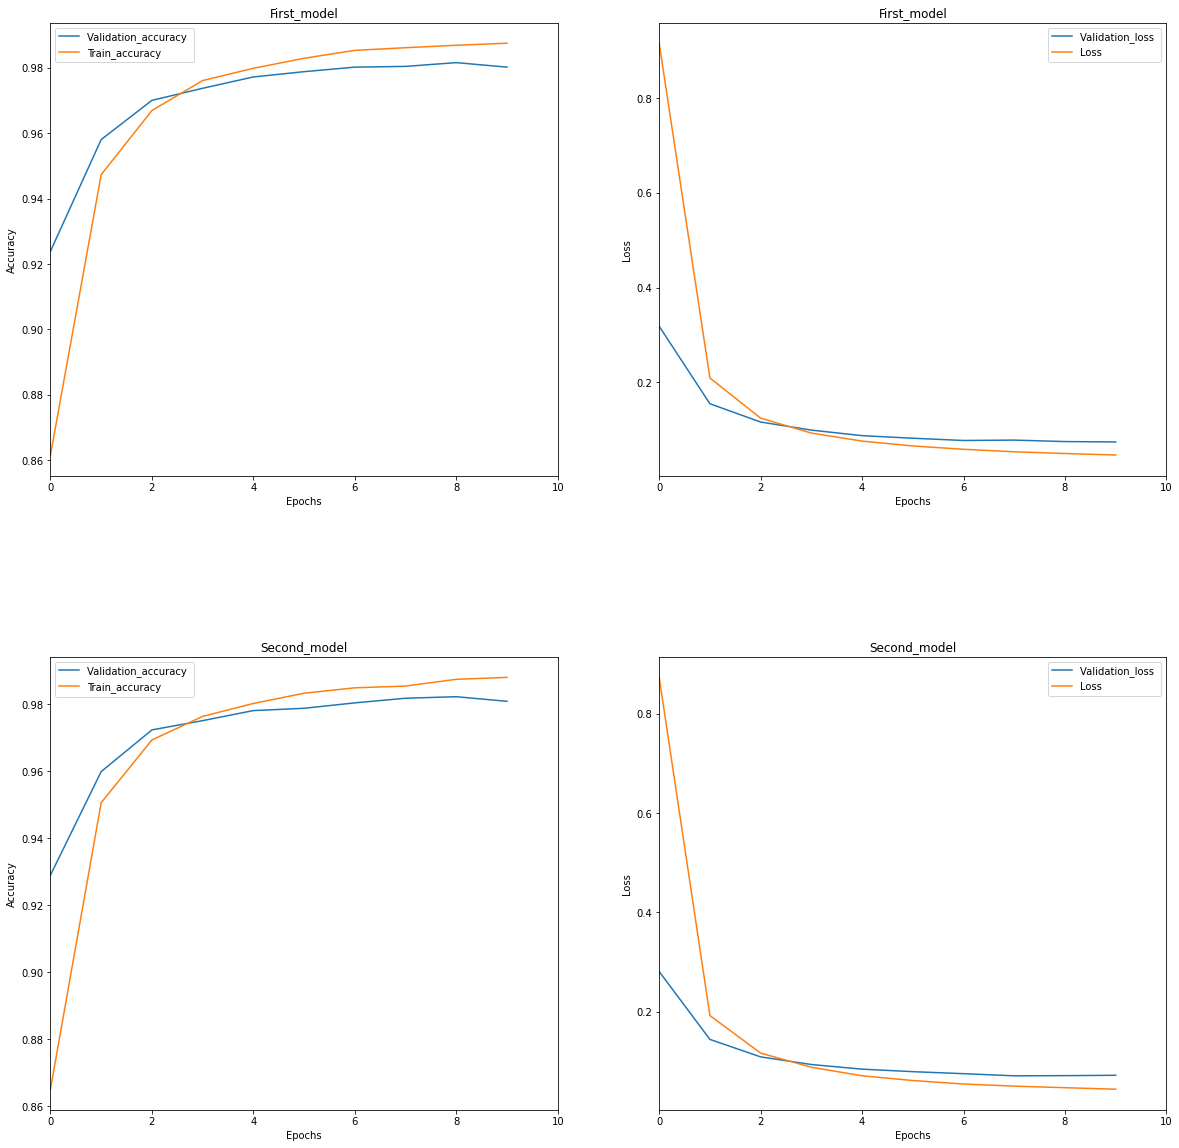

In [10]:
## Plotting

plt.figure(1, figsize=(20,20))
count = 1
for history in history_dict:
  train_acc = history_dict[history].history['accuracy']
  val_acc = history_dict[history].history['val_accuracy']
  loss = history_dict[history].history['loss']
  val_loss = history_dict[history].history['val_loss']
  
  plt.subplot(2,2, count)
  plt.plot(val_acc, label= "Validation_accuracy ")
  plt.plot(train_acc, label = "Train_accuracy ") 
  plt.title(""+history)
  plt.xlabel("Epochs")
  #plt.ylim(0,1)
  plt.xlim(0,10)
  plt.ylabel("Accuracy")
  plt.legend()

  plt.subplot(2,2, count+1)
  plt.subplots_adjust(hspace=0.4)
  plt.plot(val_loss, label="Validation_loss ")
  plt.plot(loss, label = "Loss ")
  plt.title(""+history)
  plt.xlabel("Epochs")
  #plt.ylim(0,1)
  plt.xlim(0,10)
  plt.ylabel("Loss")
  plt.legend()

  count = count + 2

plt.show()